In [2]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# These two lines set nicer looking defaults for matplotlib
import seaborn as sns
sns.set(style='ticks', palette='Set1')

## Harmonic numbers

Harmonic numbers are given by

$$ H_n = \sum_{k=1}^n \frac{1}{k} $$

In [3]:
# Calculate the harmonic number Hn, by doing the
# sum from the largest nmuber to the smallest
def forward(n):
    Hn = np.float32(0)
    for i in range(1, n+1):
        Hn += np.float32(1/i)
    return Hn

# Calculate the harmonic number Hn, by doing the
# sum from the smallest nmuber to the largest
def backward(n):
    Hn = np.float32(0)
    for i in range(n, 0, -1):
        Hn += np.float32(1/i)
    return Hn

In [4]:
# Calculate Hn in both ways, and print answer with 6 decimals
n = 500000
print('Forward sum:  %.6f' % forward(n))
print('Backward sum: %.6f' % backward(n))

Forward sum:  13.690692
Backward sum: 13.699607


## Precision limits and data types

In [5]:
# 4 byte integer
dtype = np.int32
print('min: ', np.iinfo(dtype).min)
print('max: ', np.iinfo(dtype).max)

min:  -2147483648
max:  2147483647


In [6]:
# 8 byte integer
dtype = np.int64
print('min: ', np.iinfo(dtype).min)
print('max: ', np.iinfo(dtype).max)

min:  -9223372036854775808
max:  9223372036854775807


In [7]:
# 4 byte float (single precision)
dtype = np.float32
print('tiny: ', np.finfo(dtype).tiny)
print('huge: ', np.finfo(dtype).max)
print('eps:  ', np.finfo(dtype).eps)

tiny:  1.17549e-38
huge:  3.40282e+38
eps:   1.19209e-07


In [8]:
# 8 byte float (double precision)
dtype = np.float64
print('tiny: ', np.finfo(dtype).tiny)
print('huge: ', np.finfo(dtype).max)
print('eps:  ', np.finfo(dtype).eps)

tiny:  2.22507385851e-308
huge:  1.79769313486e+308
eps:   2.22044604925e-16


## Addition and subtraction

In [9]:
# 1 + a = 1, if a < epsilon/2
print('%.7f' % (np.float32(0.5e-7) + np.float32(1)))

1.0000000


In [10]:
# Order matters. By adding the two small numbers first, they are
# large enough to be added to 1. Hence, floating point arithmetic on
# a computer is not commutative and associative.
print('%.7f' % (np.float32(0.5e-7) + np.float32(0.5e-7) + np.float32(1)))
print('%.7f' % (np.float32(1) + np.float32(0.5e-7) + np.float32(0.5e-7)))

1.0000001
1.0000000


## Example: exponential

In [11]:
# Implementing a function to calculate exp(x) as a series,
# including only the first n terms
def exp(x, n = 10):
    result = np.float32(0)
    for i in range(n):
        result += np.float32(x**i / np.math.factorial(i))
    return result


In [12]:
# Comparing to exponential function from numpy, np.exp
# Note the large difference in precision between positive and negative numbers
x = 7
print('exp(%.2f)' % x)
print('Series: ', '%.6f' % exp(x, n = 15))
print('Numpy:  ', '%.6f' % np.exp(x))
print()
x = -7
print('exp(%.2f)' % x)
print('Series: ', '%.6f' % exp(x, n = 15))
print('Numpy:  ', '%.6f' % np.exp(x))

exp(7.00)
Series:  1090.363525
Numpy:   1096.633158

exp(-7.00)
Series:  2.511951
Numpy:   0.000912


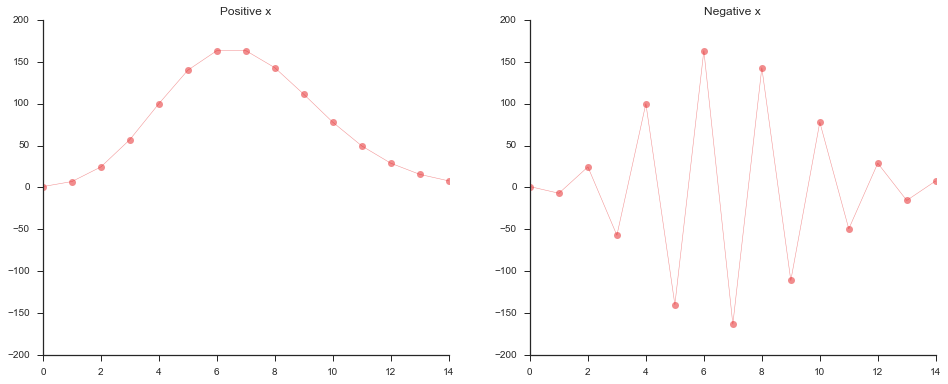

In [13]:
# Two plots to illustrate what's happening:

# Make a figure with two subplots, side by side.
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# When x is positive, we calculate a large number (exp(x)), by
# adding large positive numbers, and the loss of precision is modest.
x =  7
N =  15

# Calculate the terms
ints  = np.arange(N)
terms = np.zeros(N)
for i in ints:
    terms[i] = x**i / np.math.factorial(i)

# Plot terms, set limits, add title and remove top and right axis
axes[0].plot(ints, terms, marker = 'o', linewidth = 0.5, alpha = 0.5)
axes[0].set_ylim((-200, 200))
axes[0].set_title('Positive x')
sns.despine()

# When x is negative, we calculate a small number (exp(x)), by
# adding alternating large positive and large negative numbers,
# which leads to a catastrophic loss of precision.
x =  -7
N =  15

# Calculate the terms
ints  = np.arange(N)
terms = np.zeros(N)
for i in ints:
    terms[i] = x**i / np.math.factorial(i)
    
# Plot terms, set limits, add title and remove top and right axis
axes[1].plot(ints, terms, marker = 'o', linewidth = 0.5, alpha = 0.5)
axes[1].set_ylim((-200, 200))
axes[1].set_title('Negative x')
sns.despine()

## Examples: trigonometric functions

In [14]:
# Result should be 0, because cos(pi/2) = 0
x = np.float32(1e-9)
print(np.cos(np.pi/2, dtype = np.float32) / x)

-43.7114


In [15]:
# The two results should be the same
x = np.float32(1e-4)
print((1 - np.cos(x)) / np.sin(x))
print(np.sin(x) / (1 + np.cos(x)))

0.0
4.99999987369e-05


In [16]:
# In double precision, they are closer
x = np.float64(1e-4)
print((1 - np.cos(x)) / np.sin(x))
print(np.sin(x) / (1 + np.cos(x)))

4.99999997795e-05
5.00000000417e-05
